In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from knetworks import knetworks, Network
from sklearn.preprocessing import StandardScaler
import numpy as np
%config InlineBackend.figure_format='retina'

import torch
import torch.nn as nn

device = torch.device("cuda")

In [2]:
centers = 6
samples = 300
X, _ = make_blobs(n_samples=samples, centers=centers, n_features=2, cluster_std=0.9, random_state=2)
scaler = StandardScaler()
X = scaler.fit_transform(X)

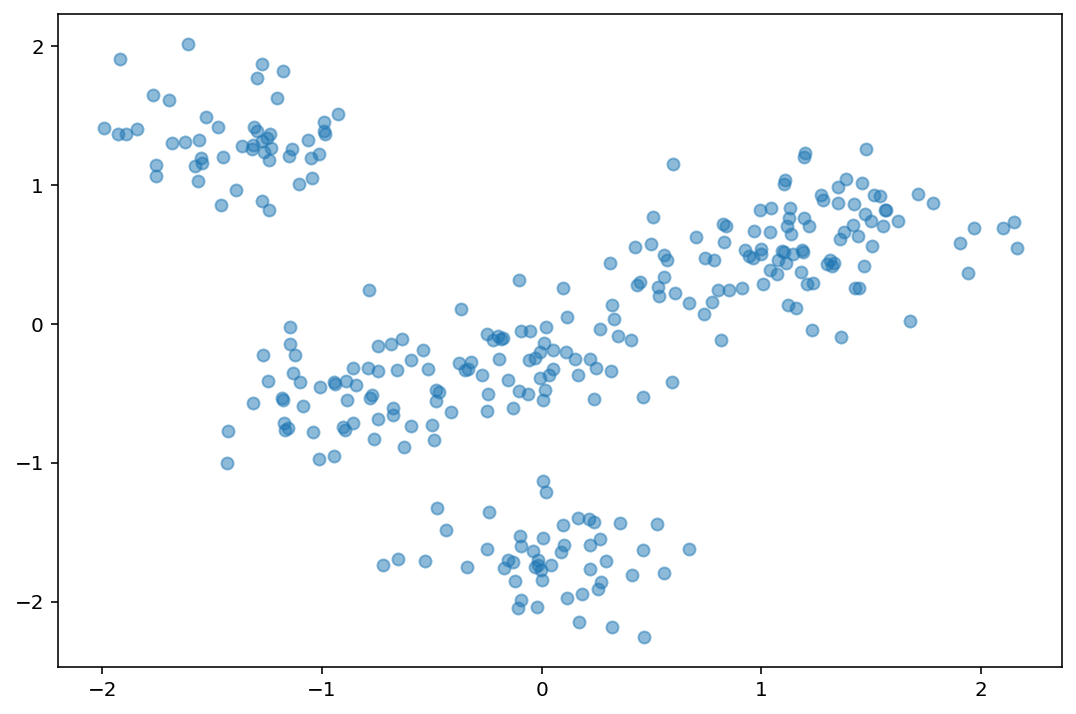

In [3]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:,-1], alpha=0.5)

In [4]:
knet = knetworks(centers,X, 56, device)

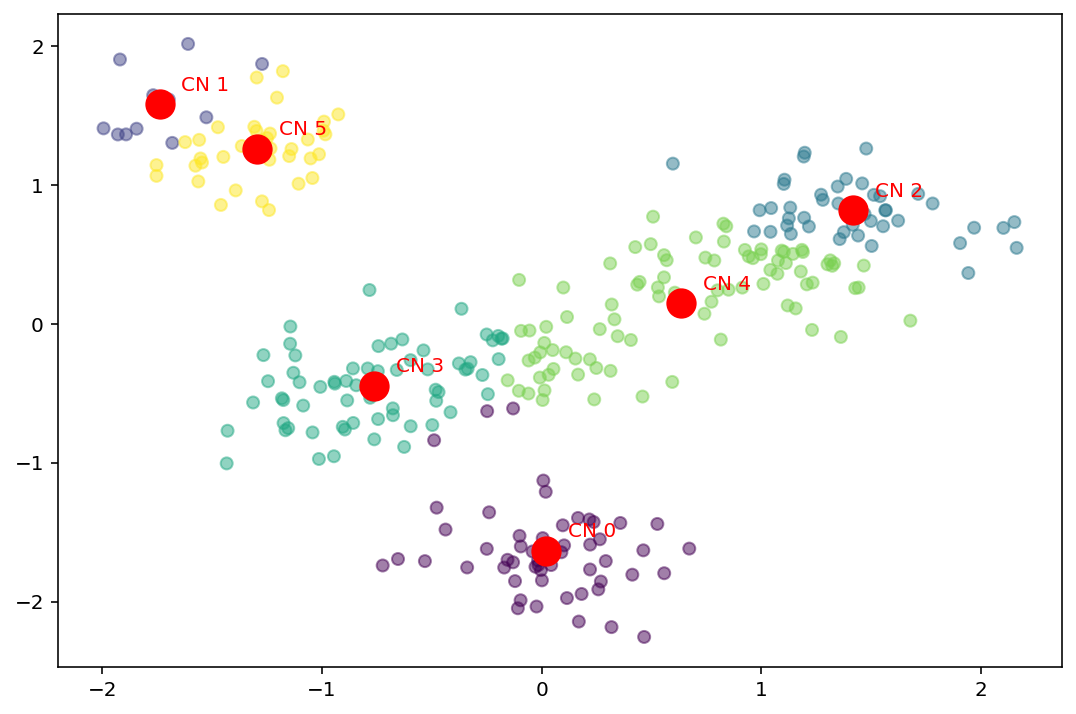

In [5]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:,-1], alpha=0.5, c=knet.km.affiliations)
plt.scatter(knet.centroids[:,0], knet.centroids[:,-1], s=200, c='r')
for k in range(knet.k):
    plt.text(x=knet.centroids[k,0]+0.1, y=knet.centroids[k,-1]+0.1 , s='CN ' + str(k), c='r')

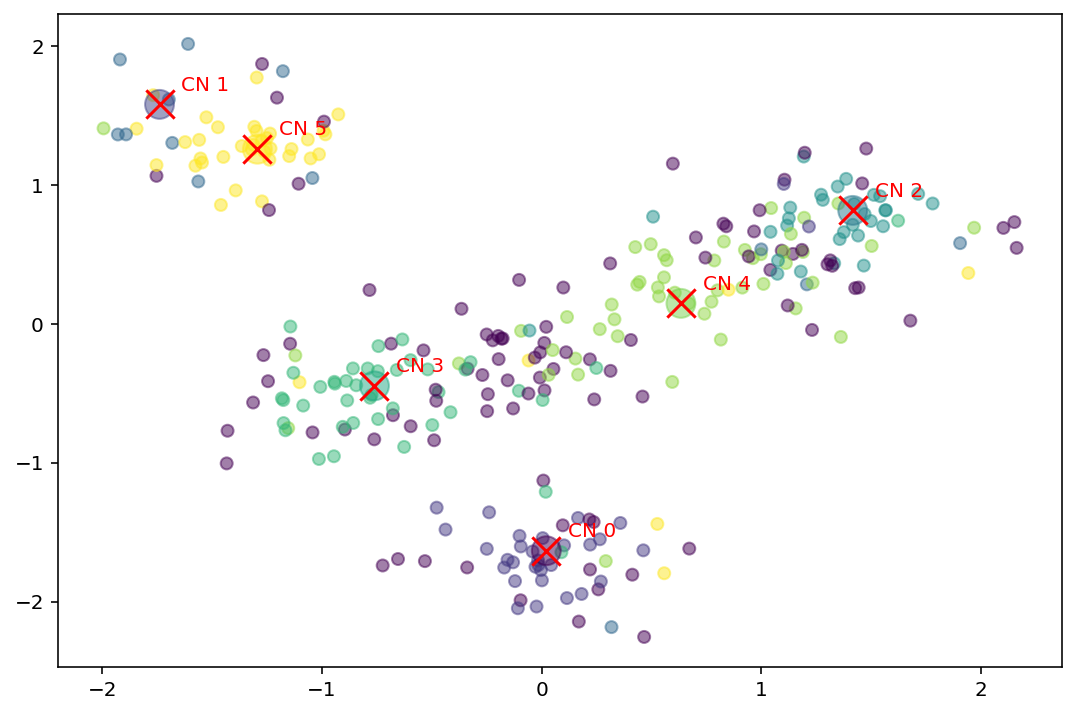

In [6]:
plt.figure(figsize=(9, 6))
colors = np.full((samples,1),0)
p = []

for k in range(knet.k):
    p = np.array([knet.sampleRandom(k) for i in range(100)]) # get Random Training Sample for centroid 0
    colors[p] = k+1

plt.scatter(X[:,0], X[:,-1], c=colors, alpha=0.5)

plt.scatter(knet.centroids[:,0], knet.centroids[:,-1], s=209, c=[i+1 for i in range(knet.k)] , alpha=0.5)
plt.scatter(knet.centroids[:,0], knet.centroids[:,-1], s=200, c='r', marker="x")

for k in range(knet.k):
    plt.text(x=knet.centroids[k,0]+0.1, y=knet.centroids[k,-1]+0.1 , s='CN ' + str(k), c='r')

In [7]:
file = open("testdata/0.txt", "r") 
lines = file.readlines()

features = (sorted(lines[0].replace(" ", "").upper().split(",")))

vectors = []
print(len(features))
for l in range(len(lines)-1):
    vec = lines[l+1].upper().split(",")
    vectors.append([int(i) for i in vec])

56


In [8]:
tdata = np.array(vectors[:-4])

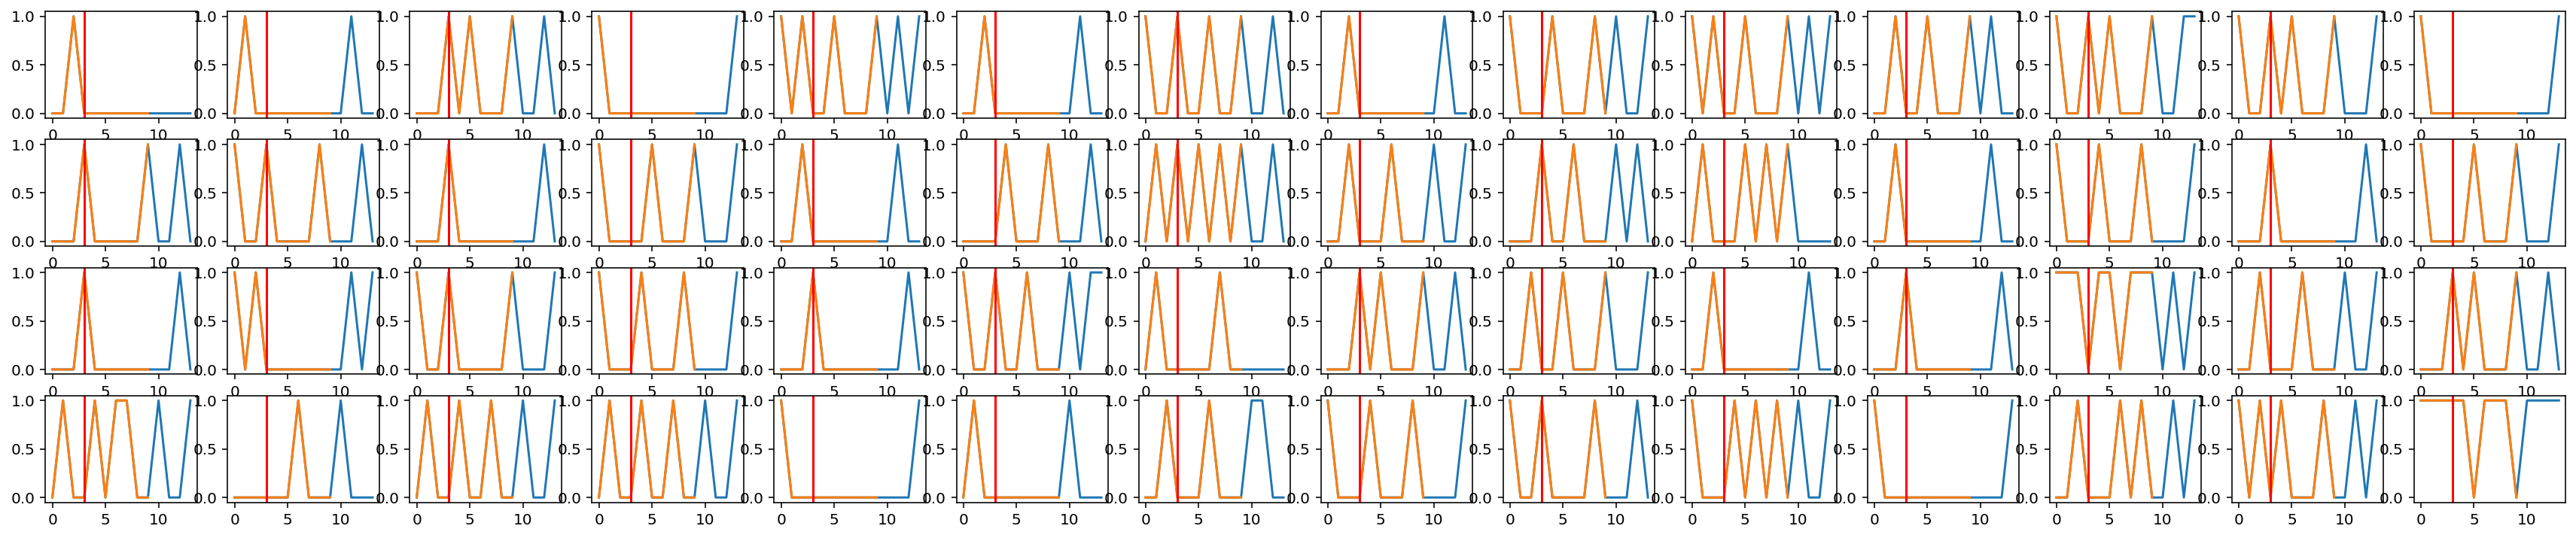

In [9]:
f, axes = plt.subplots(4, 14, figsize=(30, 6))
count = 0
for i in range(4):
    for j in range(14):
        axes[i][j].plot(np.array(vectors)[:,count])
        axes[i][j].plot(tdata[:,count])
        axes[i][j].axvline(x=3, ymin=0, ymax=1, c='r')
        count += 1

In [13]:
knet.calcProductMean(tdata, 10)

array([0.1, 0.1, 0.3, 0.1, 0.4, 0.1, 0.4, 0.1, 0.3, 0.4, 0.3, 0.4, 0.4,
       0.1, 0.2, 0.3, 0.1, 0.3, 0.1, 0.2, 0.5, 0.2, 0.2, 0.4, 0.1, 0.3,
       0.1, 0.3, 0.1, 0.2, 0.3, 0.3, 0.1, 0.3, 0.2, 0.3, 0.3, 0.1, 0.1,
       0.8, 0.2, 0.3, 0.4, 0.1, 0.3, 0.3, 0.1, 0.1, 0.2, 0.3, 0.3, 0.4,
       0.1, 0.3, 0.4, 0.8])

In [14]:
net = knet.networks[0]

In [15]:
net.model.train()
net.train(tdata, epochs=600, verbose=True)

In [18]:
from scipy.special import expit
net.model.eval()
predict = np.array(net.predict(tdata, future=4))

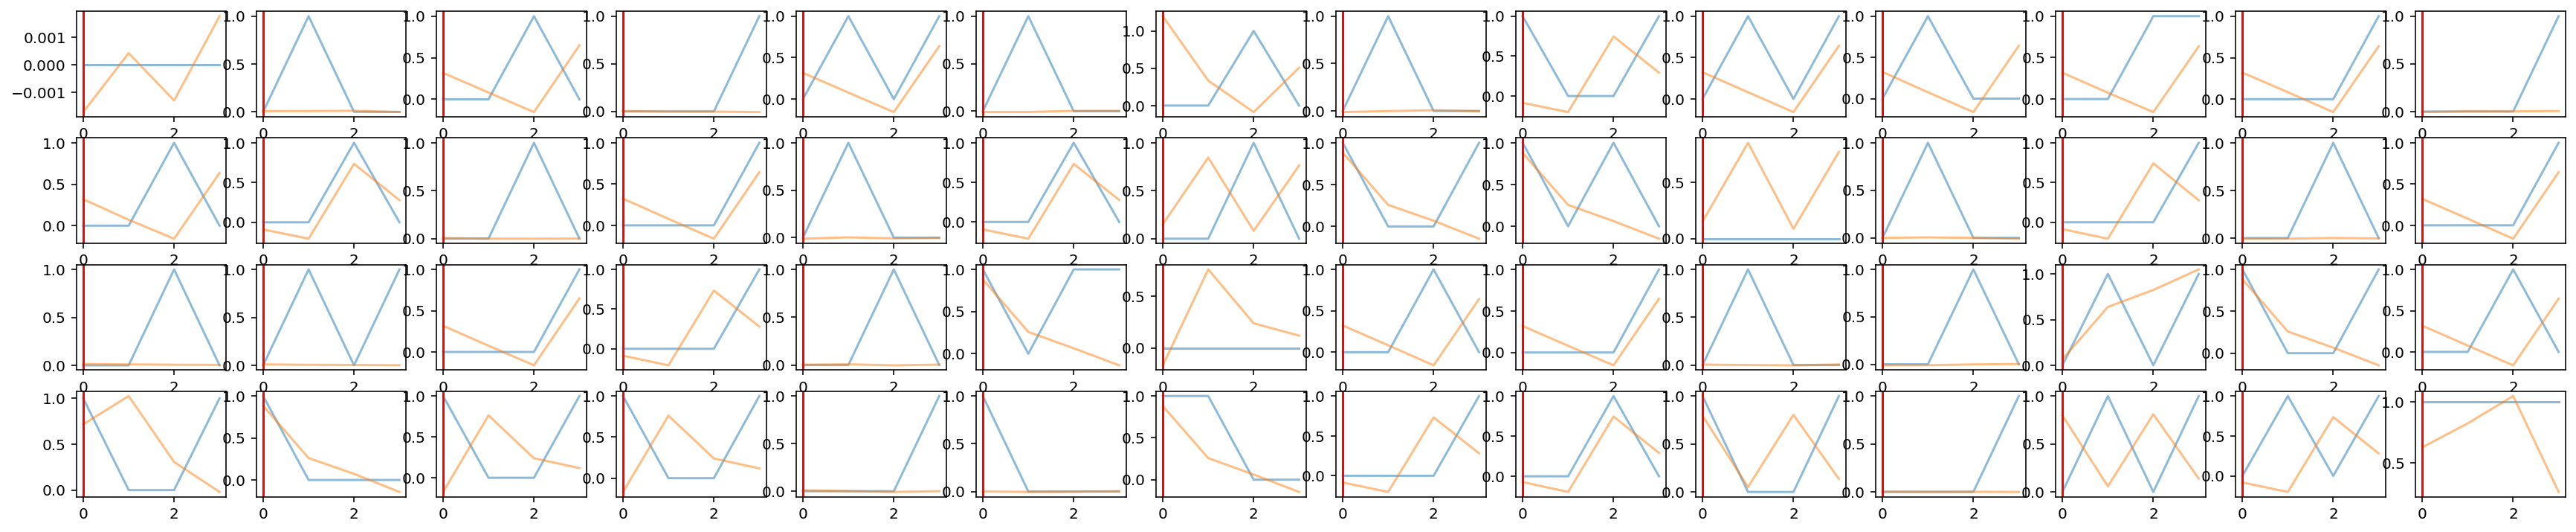

In [19]:
f, axes = plt.subplots(4, 14, figsize=(30, 6))
count = 0
for i in range(4):
    for j in range(14):
        axes[i][j].plot(np.array(vectors[-4:])[:,count], alpha=0.5)
        axes[i][j].plot(predict[:,count], alpha=0.5)
        axes[i][j].axvline(x=0, ymin=0, ymax=1, c='r')
        count += 1